In [1]:
!nvidia-smi

Sun Sep 17 14:09:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd

/content


In [3]:
import os

In [4]:
ROOT ="/content/drive/MyDrive/ANN-for_Regression"
os.chdir(ROOT)

In [5]:
!pwd

/content/drive/MyDrive/ANN-for_Regression


In [6]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
housing = fetch_california_housing()

In [8]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [10]:
X = pd.DataFrame(housing.data, columns= housing.feature_names)

In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
y = pd.DataFrame(housing.target, columns= ["target"])

In [13]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [14]:
X.shape

(20640, 8)

In [15]:
y.shape

(20640, 1)

In [16]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,random_state = 42)


In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,random_state = 42)

In [18]:
X_train_full.shape

(15480, 8)

In [19]:
X_test.shape

(5160, 8)

In [20]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [21]:
X_train.shape

(11610, 8)

In [22]:
X_train.shape[:1]

(11610,)

In [23]:
LAYERS = [

    tf.keras.layers.Dense(30, activation="relu",input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
]

In [24]:
model = tf.keras.models.Sequential(LAYERS)

In [25]:
## For Calculating accuracy score (r2 score)
# from Keras import backend as k

def coeff_determination(y_ture, y_pred):
  from keras import backend as K
  SS_res = K.sum(K.square(y_ture-y_pred))
  SS_tot = K.sum(K.square(y_ture - K.mean(y_ture)))
  return (1 - SS_res/(SS_tot + K.epsilon()))



In [26]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics=[coeff_determination])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [30]:
EPOCHS = 10

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 7s 5ms/step - loss: 0.7091 - coeff_determination: 0.4466 - val_loss: 0.4868 - val_coeff_determination: 0.5878
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4149 - coeff_determination: 0.6718 - val_loss: 0.3897 - val_coeff_determination: 0.6822
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3909 - coeff_determination: 0.6918 - val_loss: 0.4874 - val_coeff_determination: 0.5859
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3798 - coeff_determination: 0.6957 - val_loss: 1.4548 - val_coeff_determination: -0.4050
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3769 - coeff_determination: 0.7012 - val_loss: 0.3856 - val_coeff_determination: 0.6768
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3663 - coeff_determination: 0.7076 - val_loss: 0.3464 - val_coeff_determination: 0.7147
Epoch 7/10
363/

In [31]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.709083,0.446578,0.486816,0.587842
1,0.414873,0.671817,0.389661,0.682179
2,0.390909,0.691773,0.487424,0.585926
3,0.379753,0.695740,1.454839,-0.404965
4,0.376922,0.701150,0.385577,0.676794
5,0.366267,0.707638,0.346370,0.714714
6,0.359890,0.712399,0.336065,0.723481
7,0.354796,0.715730,0.342391,0.715511
8,0.351858,0.715959,0.331470,0.726200
9,0.348847,0.714259,0.328458,0.731786


<Axes: >

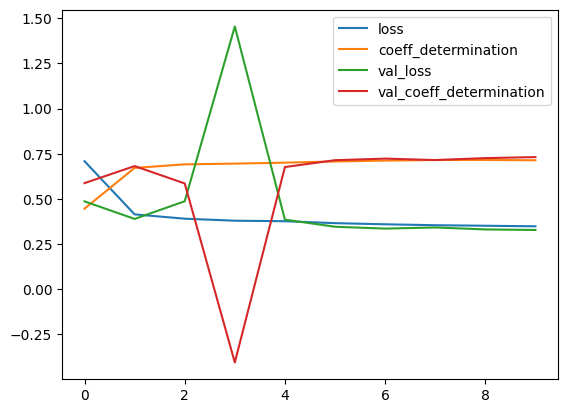

In [32]:
pd.DataFrame(history.history).plot()

In [34]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3483 - coeff_determination: 0.7157


[0.34833380579948425, 0.7157055735588074]

In [35]:
new = X_test[0]

In [36]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [37]:
new.shape

(8,)

In [38]:
new = new.reshape((1,8))

In [39]:
new.shape

(1, 8)

In [40]:
model.predict(new)

1/1 [==============================] - 0s 281ms/step


array([[0.8087406]], dtype=float32)

In [41]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
5363,5.00001
19755,0.63200
4885,1.17700
13043,2.63100
